## Entrenamiento de un modelo logísitco

En primer lugar planteamos la realización de un modelo logístico dadas las características de los datos.

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

airline_df = pd.read_csv('../src/Data/airline_recoded.csv')

Entrenamiento del modelo con validación cruzada.

In [7]:
X = airline_df.drop(columns = ['satisfaction'])
y = airline_df['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X_scaled, y, cv=5)

print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Media de los puntajes: {cv_scores.mean()}")

Puntajes de validación cruzada: [0.87320148 0.86997738 0.87219094 0.87252779 0.87930703]
Media de los puntajes: 0.8734409249509263


Evaluación mediante matriz de confusión y precisión

Precisión del modelo: 0.873893237520852


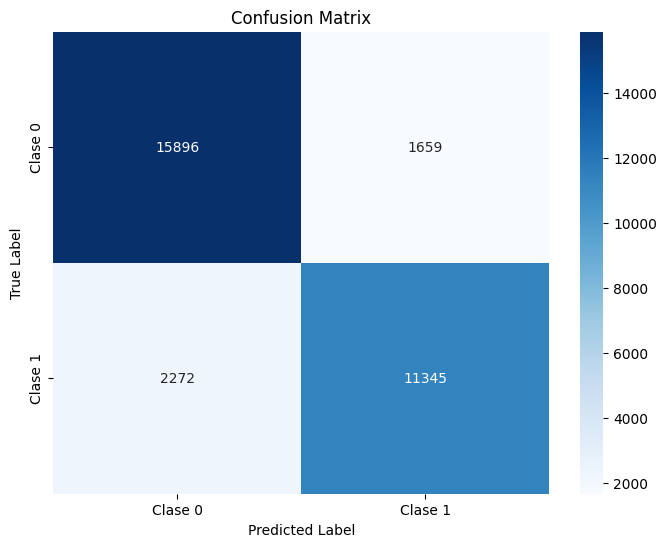

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     17555
           1       0.87      0.83      0.85     13617

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

print(f"Precisión del modelo: {accuracy}")
plt.show()
print("Reporte de clasificación:\n", class_report)

Cálculo de curva ROC para evaluación de rendimiento del modelo

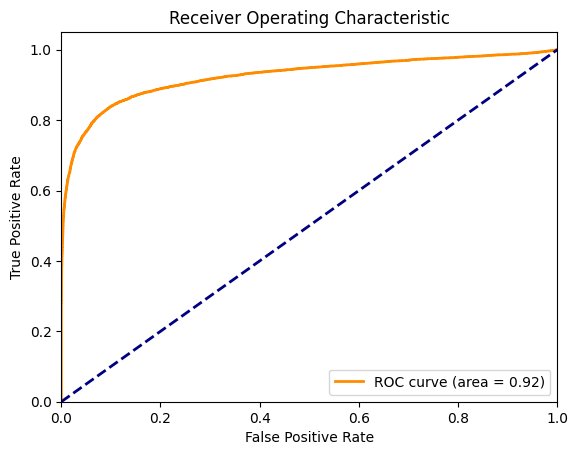

In [9]:
y_probs = model.predict_proba(X_test)[:, 1]

# Curva ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr,tpr)

#Gráfico
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Utilizando regularización para ver el overfitting

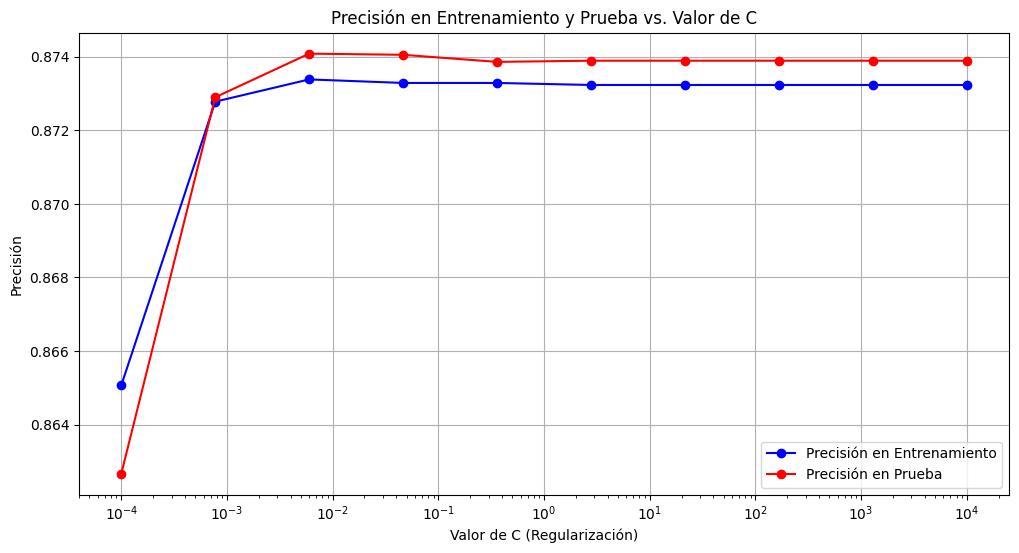

In [10]:
C_values = np.logspace(-4, 4, 10)  # Diferentes valores de C en escala logarítmica

train_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar las precisiones
plt.figure(figsize=(12, 6))
plt.plot(C_values, train_accuracies, marker='o', linestyle='-', color='b', label='Precisión en Entrenamiento')
plt.plot(C_values, test_accuracies, marker='o', linestyle='-', color='r', label='Precisión en Prueba')
plt.xscale('log')  # Escala logarítmica para los valores de C
plt.xlabel('Valor de C (Regularización)')
plt.ylabel('Precisión')
plt.title('Precisión en Entrenamiento y Prueba vs. Valor de C')
plt.legend()
plt.grid(True)
plt.show()

Coeficientes de regresión

C:\Users\Alberto\AppData\Local\Temp\ipykernel_8608\204530164.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


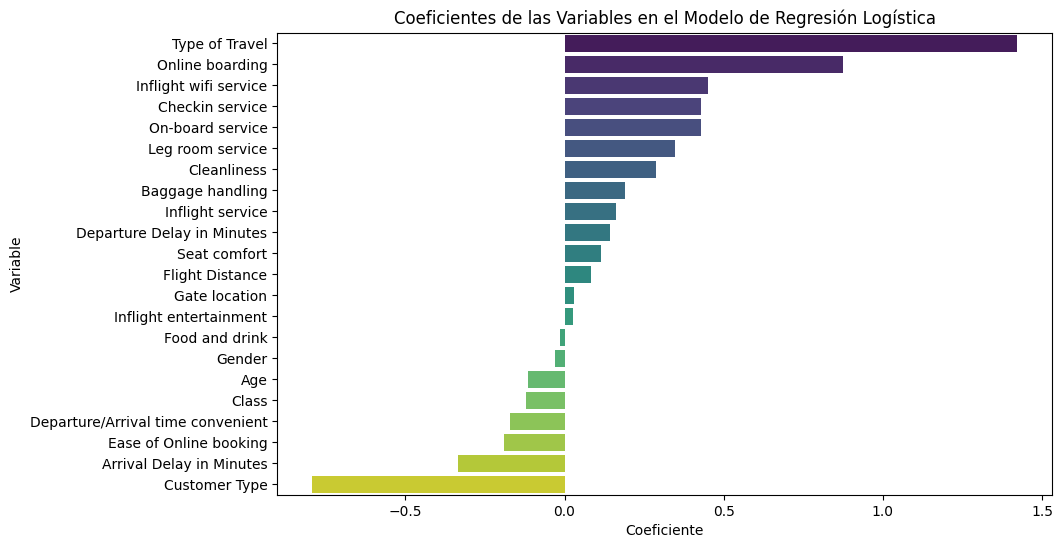

In [17]:
coefficients = model.coef_[0]
feature_names = X.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordenar el DataFrame por los coeficientes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Coeficientes de las Variables en el Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show()

### Pruebas con nuevos datos

Generamos una base de datos aleatoria

In [2]:
import random
import numpy as np
import pandas as pd

def generar_valores_aleatorios():
    return {
        'Gender': random.randint(0, 1),
        'Customer Type': random.randint(0, 1),
        'Age': random.randint(0, 100),
        'Type of Travel': random.randint(0, 1),
        'Class': random.randint(0, 2),
        'Flight Distance': random.randint(0, 10000),
        'Inflight wifi service': random.randint(0, 6),
        'Departure/Arrival time convenient': random.randint(0, 6),
        'Ease of Online booking': random.randint(0, 6),
        'Gate location': random.randint(0, 6),
        'Food and drink': random.randint(0, 6),
        'Online boarding': random.randint(0, 6),
        'Seat comfort': random.randint(0, 6),
        'Inflight entertainment': random.randint(0, 6),
        'On-board service': random.randint(0, 6),
        'Leg room service': random.randint(0, 6),
        'Baggage handling': random.randint(0, 6),
        'Checkin service': random.randint(0, 6),
        'Inflight service': random.randint(0, 6),
        'Cleanliness': random.randint(0, 6),
        'Departure Delay in Minutes': random.randint(0, 2000),
        'Arrival Delay in Minutes': random.randint(0, 2000),
        'Acierto_Logistico': np.random.choice([0, 1], p = [0.13, 0.87]),
        'Acierto_XGboost': np.random.choice([0, 1], p = [1-0.961, 0.961]),
        'Acierto_Stacked': np.random.choice([0, 1], p = [0.04, 0.96]),
        'Acierto_CNN': np.random.choice([0, 1], p = [1-0.962, 0.962])
    }
# Base de datos
num_filas = 1000000
datos = [generar_valores_aleatorios() for _ in range(num_filas)]

df = pd.DataFrame(datos)

print(df.head())

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              1   51               1      0             1433   
1       0              1   42               1      0             9667   
2       0              1   51               0      0             9210   
3       1              0   17               1      1             2113   
4       0              1   14               0      0             5644   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      0                                  1   
1                      1                                  5   
2                      0                                  5   
3                      4                                  4   
4                      4                                  3   

   Ease of Online booking  Gate location  ...  Baggage handling  \
0                       1              5  ...                 0   
1                       0              0  ...   

In [3]:
df.to_csv('../src/Data/Clientes_simulados.csv', index=False)

In [15]:
prediccion = model.predict(df)
predicted_probability = model.predict_proba(df)[:, 1]

df['Prediccion'] = prediccion
df['Predicted_Probability'] = predicted_probability

print(df.head())
df.to_csv('../src/Data/Logistic_predicciones.csv', index=False)

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0    0               1      2             9771   
1       0              1   56               0      2             9637   
2       1              0   30               1      1             2029   
3       1              1   77               1      2              982   
4       0              1   25               0      1             8122   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      1                                  1   
1                      3                                  5   
2                      3                                  3   
3                      6                                  1   
4                      6                                  5   

   Ease of Online booking  Gate location  ...  On-board service  \
0                       1              5  ...                 6   
1                       6              0  ...   

e:\Bootcamp\Machine Learning\ML-Grupo5\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
e:\Bootcamp\Machine Learning\ML-Grupo5\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
